In [56]:
from platypus import NSGAII, Problem, Real, nondominated, Integer
import matplotlib.pyplot as plt
from platypus.problems import DTLZ2
import pandas as pd
import platypus
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
def belegundu(vars):
    """2変数、2目的変数の最適化問題例

    Args:
        vars (list): 試行する変数のリスト（lengh=2）

    Returns:
        それぞれの目的関数の値
    """    
    # 変数
    x = vars[0]
    y = vars[1]

    # 目的関数
    f1 = -2*x + y
    f2 = 2*x + y

    # 制約条件
    v1 = -x + y - 1
    v2 = x + y - 7

    # (目的関数のリスト, 制約条件リスト) のタプルで返す
    return [f1, f2], [v1 , v2]

In [9]:
# 問題の箱を作る
problem = Problem(2, 2, 2) # 2変数, 2目的変数, 2制約条件

# 目的関数の定義
problem.function = belegundu

# 最小化問題 or 最大化問題
problem.directions[0] = Problem.MINIMIZE # 1つ目の目的関数
problem.directions[1] = Problem.MINIMIZE # 2つ目の目的関数
# problem.directions[:] = Problem.MINIMIZE # 全部同じならこれでもOK

# 制約条件
problem.constraints[0] = "<=0" # 1つ目の制約条件
problem.constraints[1] = "<=0" # 2つ目の制約条件
# problem.constraints[:] = "<=0" # 全部同じならこれでもOK

# 変数の条件
problem.types[0] = Real(0, 5) # 1つ目変数の制約条件
problem.types[1] = Real(0, 3) # 2つ目変数の制約条件

algorithm = NSGAII(problem)
algorithm.run(1000)

In [58]:
problem = platypus.DTLZ7()

algorithm = NSGAII(problem)
# algorithm.run(1000)

In [41]:
# [ 探索した変数 | 目的関数の値 | constraint_violation(0ならfeasible=実行可能)]
result_all = algorithm.result

[Solution[0.0096743800876645,0.09117366991804463,0.028793638386236164,0.03394774641336484,0.7611145439626746,0.02448463228351827,0.22390039038624676,0.00562895358936993,0.01923509970586805,0.019389142625024225,0.06004275357694906,0.002306093032448886,0.04885451775276334,0.02508712487847961,0.22849515837469245,0.48752527286594516,0.04409803994435907,0.13055535531292042,0.0018671162569966482,0.16024457711849804,0.16080612984661527|0.0096743800876645,6.29123970306524|0]]

In [42]:
for i, solution in enumerate(result_all):
    
    vars = solution.variables
    objs = solution.objectives
    
    value_list = []
    value_list.extend(vars)
    value_list.extend(objs)
    
    if i == 0:
        cols = [f"var_{num}" for num in range(len(vars))]
        cols.extend([f"objs_{num}" for num in range(len(objs))])
        df = pd.DataFrame(columns=cols)
    
    df.loc[i] = value_list

nondominated_solutions = nondominated(result_all)
df["nondominated"] = [solution in nondominated_solutions for solution in result_all]

<AxesSubplot:xlabel='objs_0', ylabel='objs_1'>

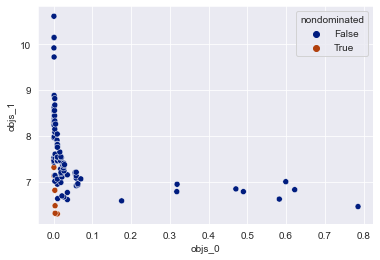

In [55]:
sns.set_style("darkgrid")
sns.set_palette("dark")
sns.scatterplot(x="objs_0", y="objs_1", data=df, hue='nondominated')

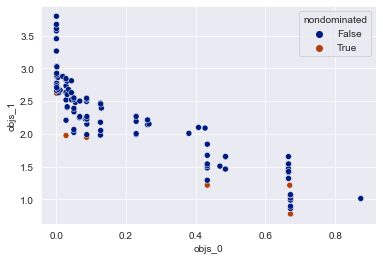

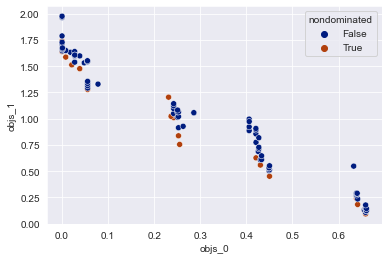

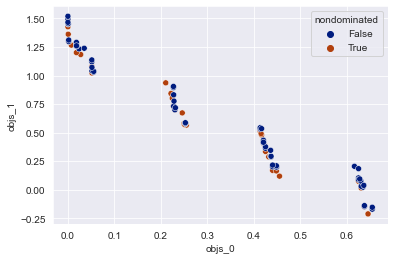

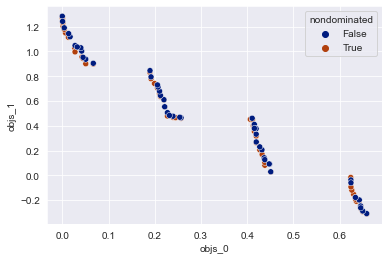

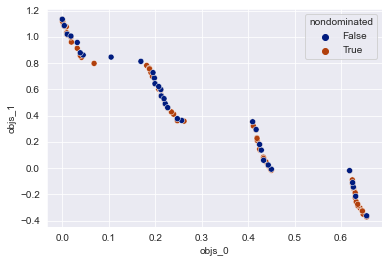

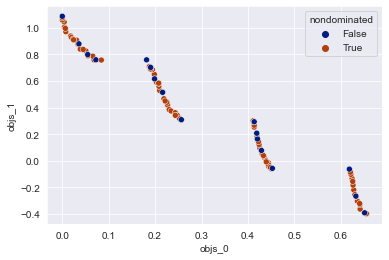

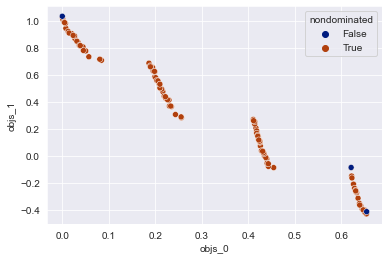

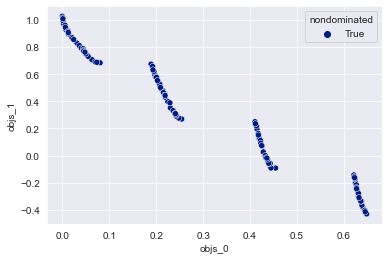

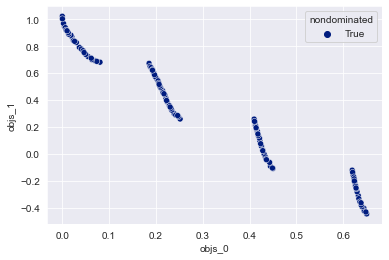

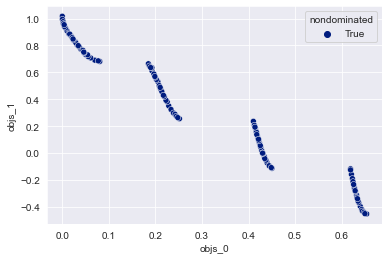

In [67]:
problem = platypus.ZDT3()
algorithm = NSGAII(problem)

for i in range(10):
    algorithm.run(1000)
    
    result_all = algorithm.result
    for i, solution in enumerate(result_all):
    
        vars = solution.variables
        objs = solution.objectives
        
        value_list = []
        value_list.extend(vars)
        value_list.extend(objs)
        
        if i == 0:
            cols = [f"var_{num}" for num in range(len(vars))]
            cols.extend([f"objs_{num}" for num in range(len(objs))])
            df = pd.DataFrame(columns=cols)
        
        df.loc[i] = value_list

    nondominated_solutions = nondominated(result_all)
    df["nondominated"] = [solution in nondominated_solutions for solution in result_all]
    
    sns.set_style("darkgrid")
    sns.set_palette("dark")
    sns.scatterplot(x="objs_0", y="objs_1", data=df, hue='nondominated')

    plt.show()